# Análisis Exploratirio de Datos (EDA) - Analisis Bivariado

<a id = "table-of-content"></a>

## Tabla de contenido

1. [Gráfica de puntos](#points)
2. [Gráfico de Violín y BoxPlots](#violinplot)
3. [Matrices de Correlación](#corrmatrix)
4. [Regresión Simple](#simpleregresion)
5. [Regresion multiple](#multipleregression)
6. [Regresion Logistica](#logisticregression)
7. [Paradoja de Simpson](#simpsonparadox)

## Importando librerias necesarias (Previa instalación)

In [1]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)
penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

/home/fernando/Desktop/Platzi/DatosPythonPlatzi/.venv/lib/python3.11/site-packages/pkg_resources/_vendor/pyparsing.py:87: DeprecationWarning: module 'sre_constants' is deprecated
  import sre_constants


## Tomando los datos de la libreria de palmerpenguins

In [2]:
preprocess_penguins_df = palmerpenguins.load_penguins()

processed_penguins_df = preprocess_penguins_df.dropna()
processed_penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


<a id ="points"></a>

## 1. Estableciendo relaciones: Gráfica de puntos

[Tabla de contenido](#table-of-content)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

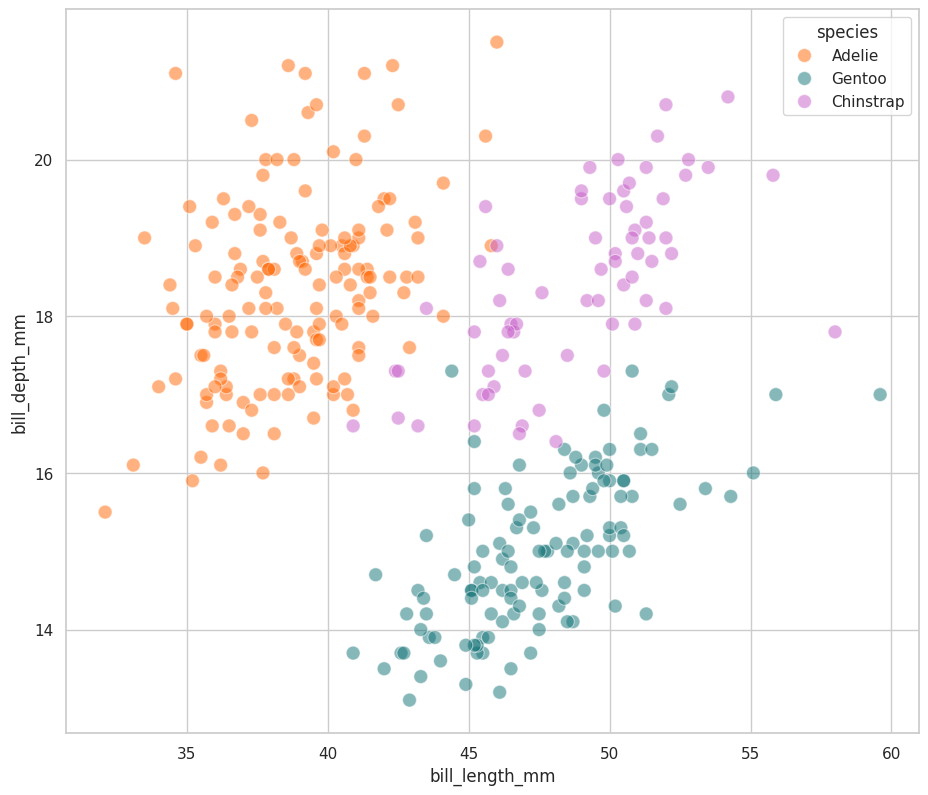

In [3]:
sns.scatterplot(
    data=processed_penguins_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    hue='species',
    alpha = 1/2,
    palette=penguin_color,
    s = 100
)

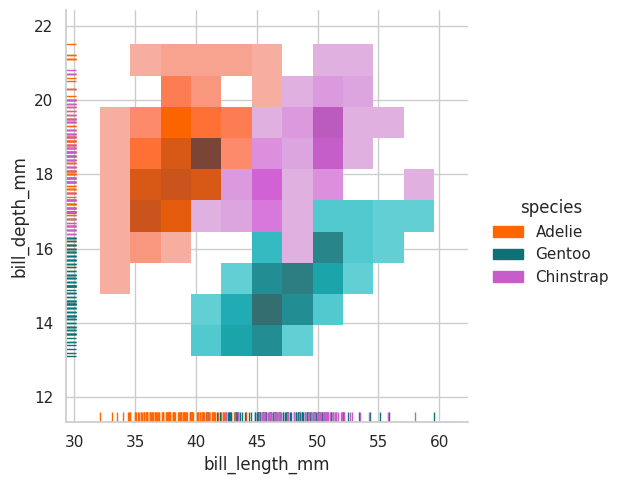

In [4]:
sns.displot(
    data=processed_penguins_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    rug=True,
    hue='species',
    palette=penguin_color
)

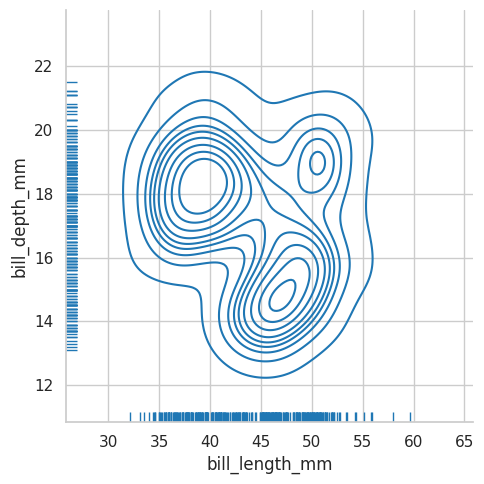

In [5]:
sns.displot(
    data=processed_penguins_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    rug=True,
    kind = 'kde'
)

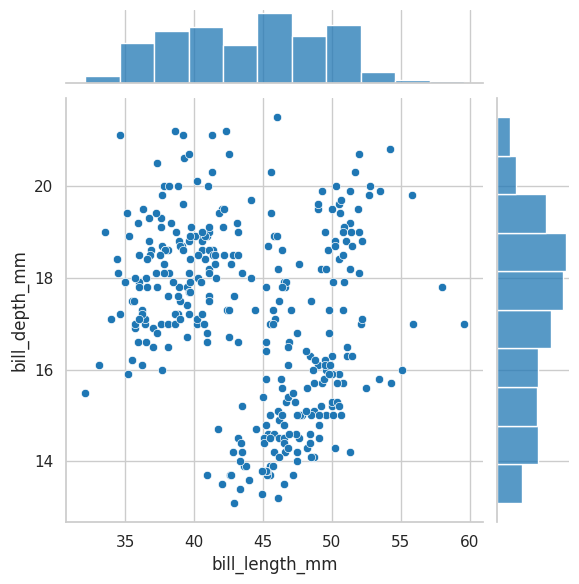

In [6]:
sns.jointplot(
    data=processed_penguins_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm'
)

<a id ="violinplot"></a>

## 2. Gráfico de Violín y BoxPlots

[Tabla de contenido](#table-of-content)

<Axes: xlabel='species', ylabel='flipper_length_mm'>

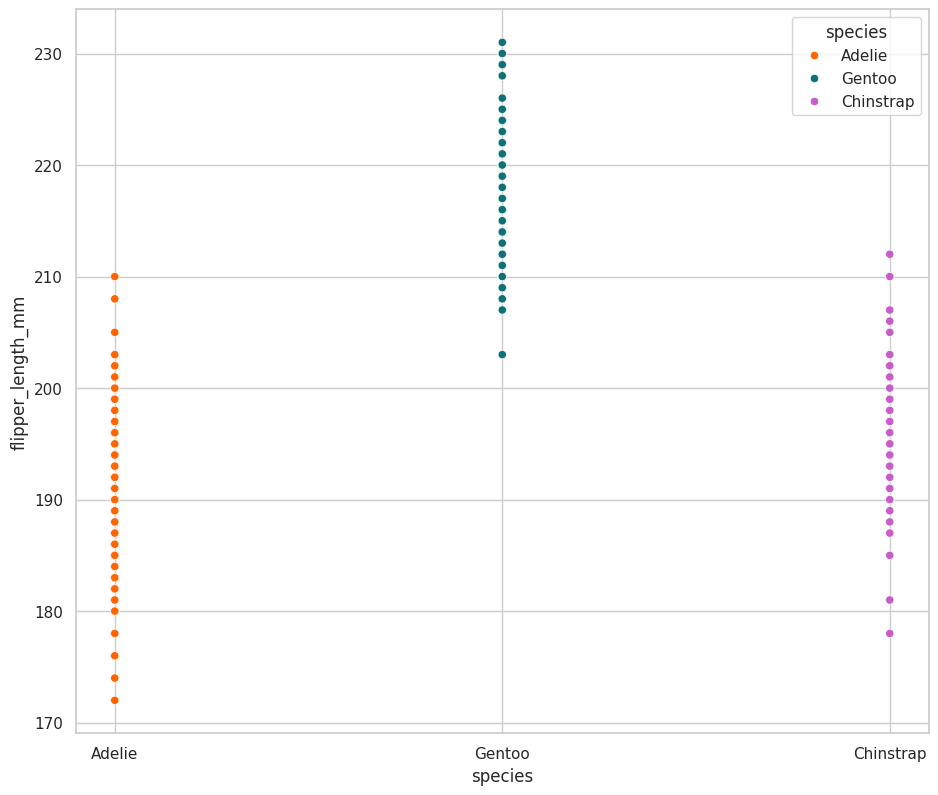

In [7]:
sns.scatterplot(
    data = processed_penguins_df,
    x = 'species',
    y = 'flipper_length_mm',
    hue='species',
    palette=penguin_color
)

<Axes: xlabel='species', ylabel='flipper_length_mm'>

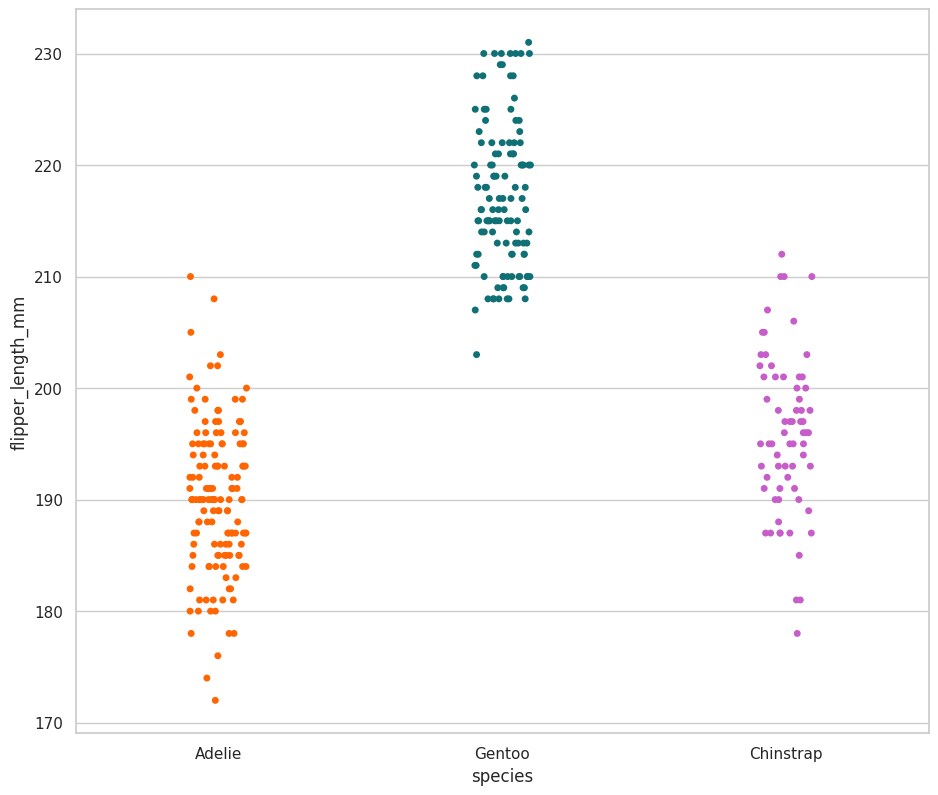

In [8]:
sns.stripplot(
    data = processed_penguins_df,
    x = 'species',
    y = 'flipper_length_mm',
    hue = 'species',
    palette=penguin_color
)

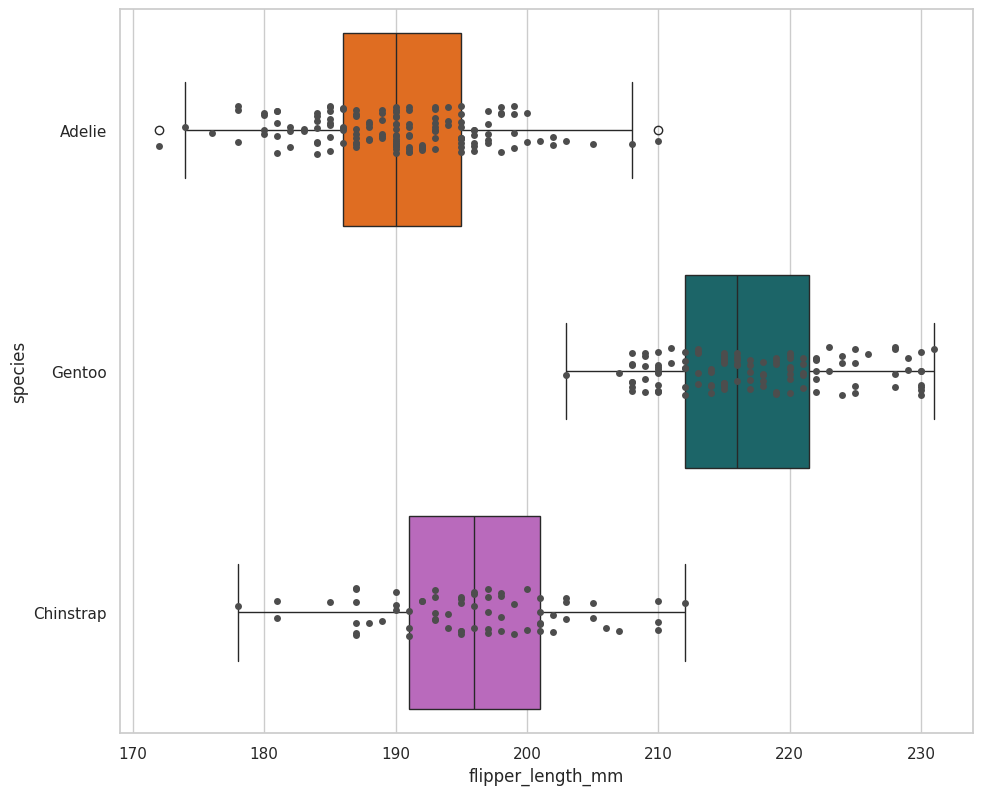

In [9]:
ax = sns.boxplot(
    data = processed_penguins_df,
    x = 'flipper_length_mm',
    y = 'species',
    hue = 'species',
    palette=penguin_color
)

ax = sns.stripplot(
    data = processed_penguins_df,
    x = 'flipper_length_mm',
    y = 'species',
    color = '.3'
)

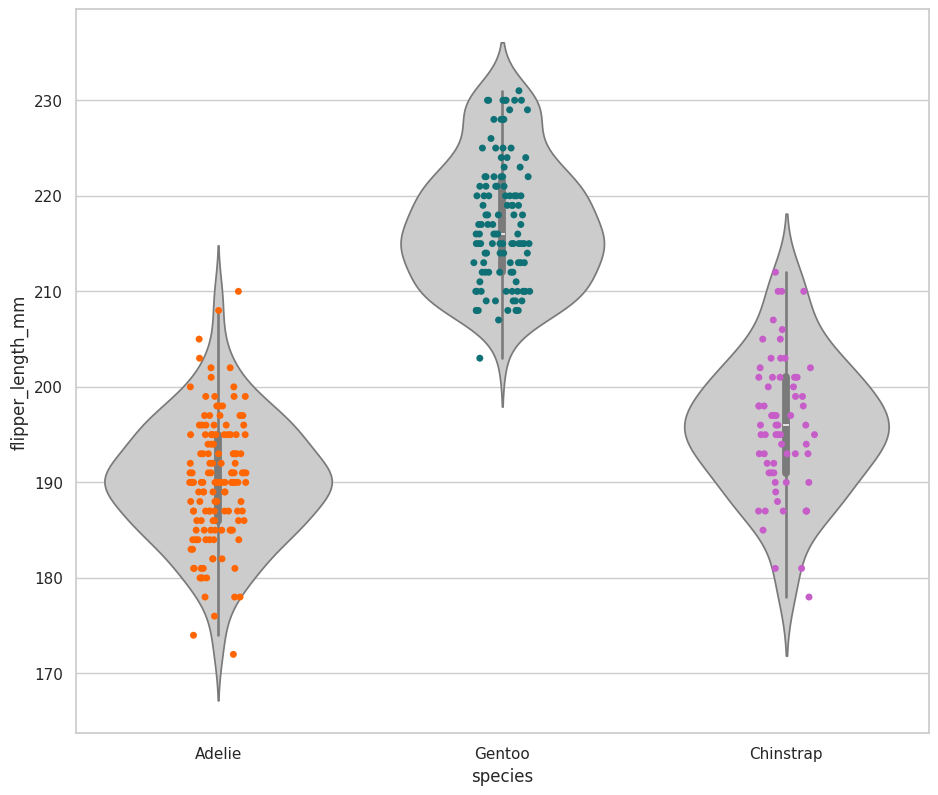

In [10]:
ax = sns.violinplot(
    data = processed_penguins_df,
    y = 'flipper_length_mm',
    x = 'species',
    color = '.8'
)

ax = sns.stripplot(
    data = processed_penguins_df,
    y = 'flipper_length_mm',
    x = 'species',
    hue = 'species',
    palette=penguin_color
)

<Axes: xlabel='species', ylabel='flipper_length_mm'>

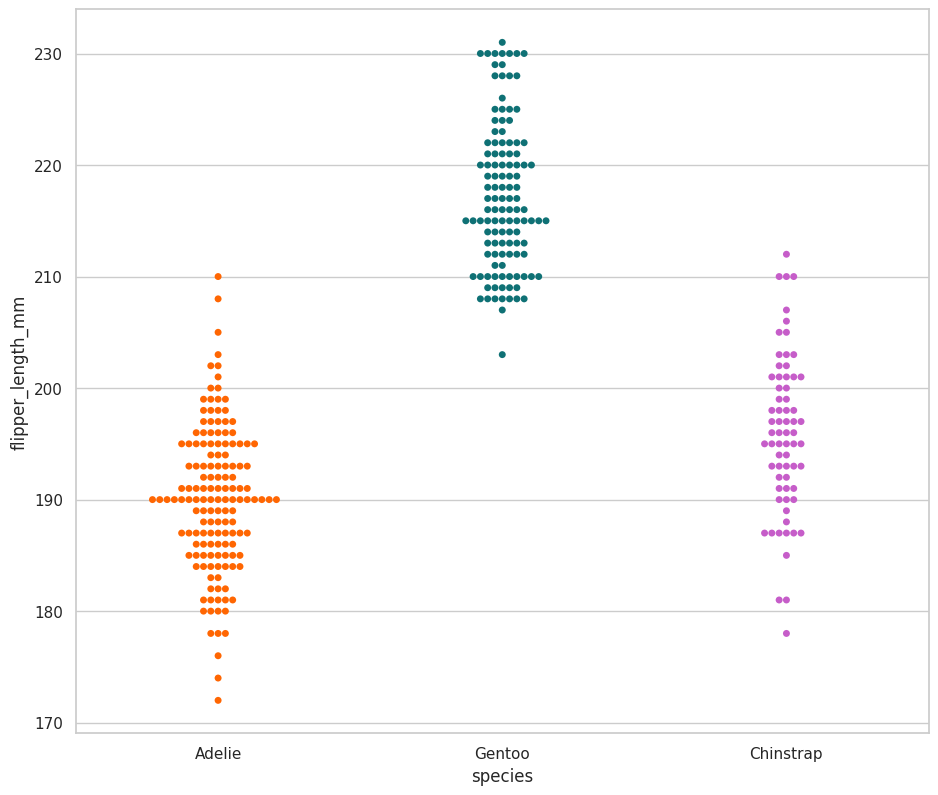

In [11]:
sns.swarmplot(
    data = processed_penguins_df,
    x = 'species',
    y = 'flipper_length_mm',
    hue = 'species',
    palette = penguin_color
)

<a id ="corrmatrix"></a>

## 3. Matrices de Correlación

[Tabla de contenido](#table-of-content)

Se utiliza el coeficiente de pierce. Yendo de 1 a -1. Si es 0 o cercano a 0 no existe correlación entre las variables. Este sirve para correlaciones de tipo lineales. La correlación no implica causalidad.

In [12]:
processed_penguins_df.corr(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


### Visualizando la matriz de correlación

<Axes: >

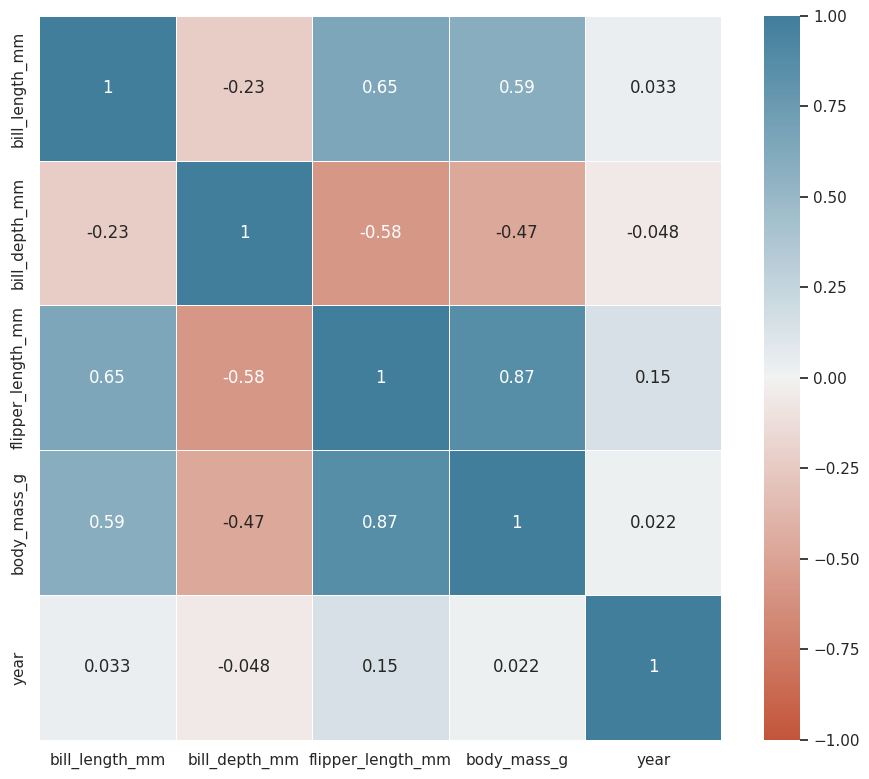

In [13]:
sns.heatmap(
    data = processed_penguins_df.corr(numeric_only = True),
    cmap = sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin = -1,
    vmax=1,
    linewidths=0.5,
    annot = True
)

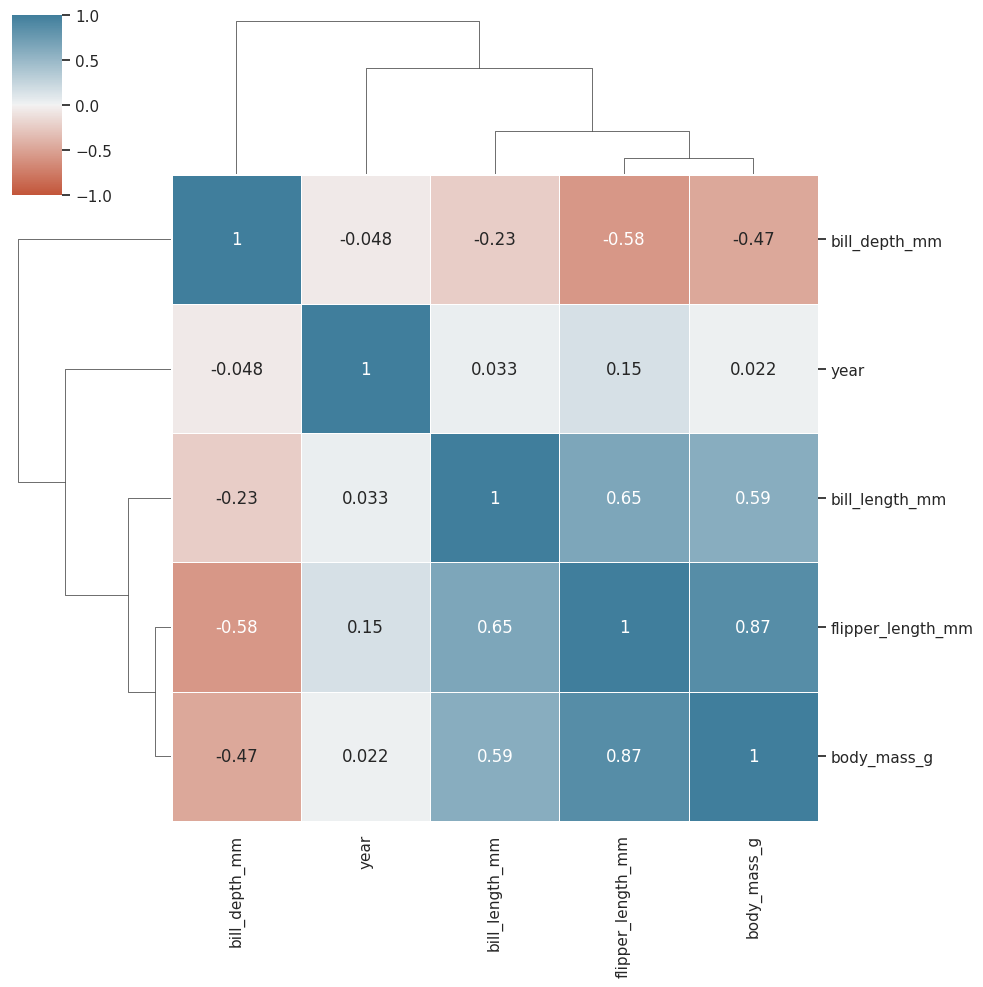

In [14]:
sns.clustermap(
    data = processed_penguins_df.corr(numeric_only = True),
    cmap = sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin = -1,
    vmax=1,
    linewidths=0.5,
    annot = True
)

### Tratando variables categoricas

In [15]:
processed_penguins_df = (
    processed_penguins_df
    .assign(
        numeric_sex = lambda df: df.sex.replace(['female', 'male'], [0,1])
    )
)

/tmp/ipykernel_15209/1586565767.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_sex = lambda df: df.sex.replace(['female', 'male'], [0,1])


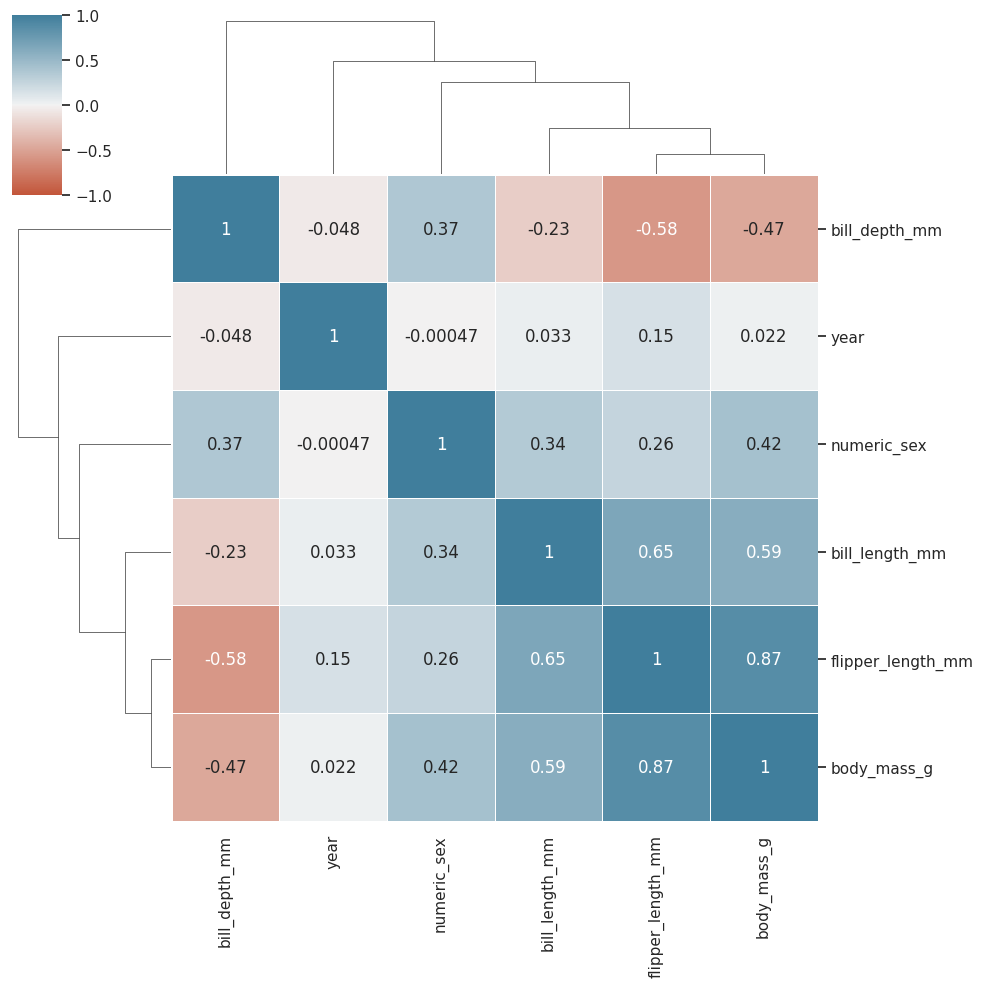

In [16]:
sns.clustermap(
    data = processed_penguins_df.corr(numeric_only = True),
    cmap = sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin = -1,
    vmax=1,
    linewidths=0.5,
    annot = True
)

### Limitantes del coeficiente de relación

Este solo nos ayuda a determinar una posible existencia de una correlación lineal; sin embargo, su ausencia no significa que no exista otro tipo de correlación

<a id ="simpleregresion"></a>

## 4. Análisis de regresión simple

[Tabla de contenido](#table-of-content)

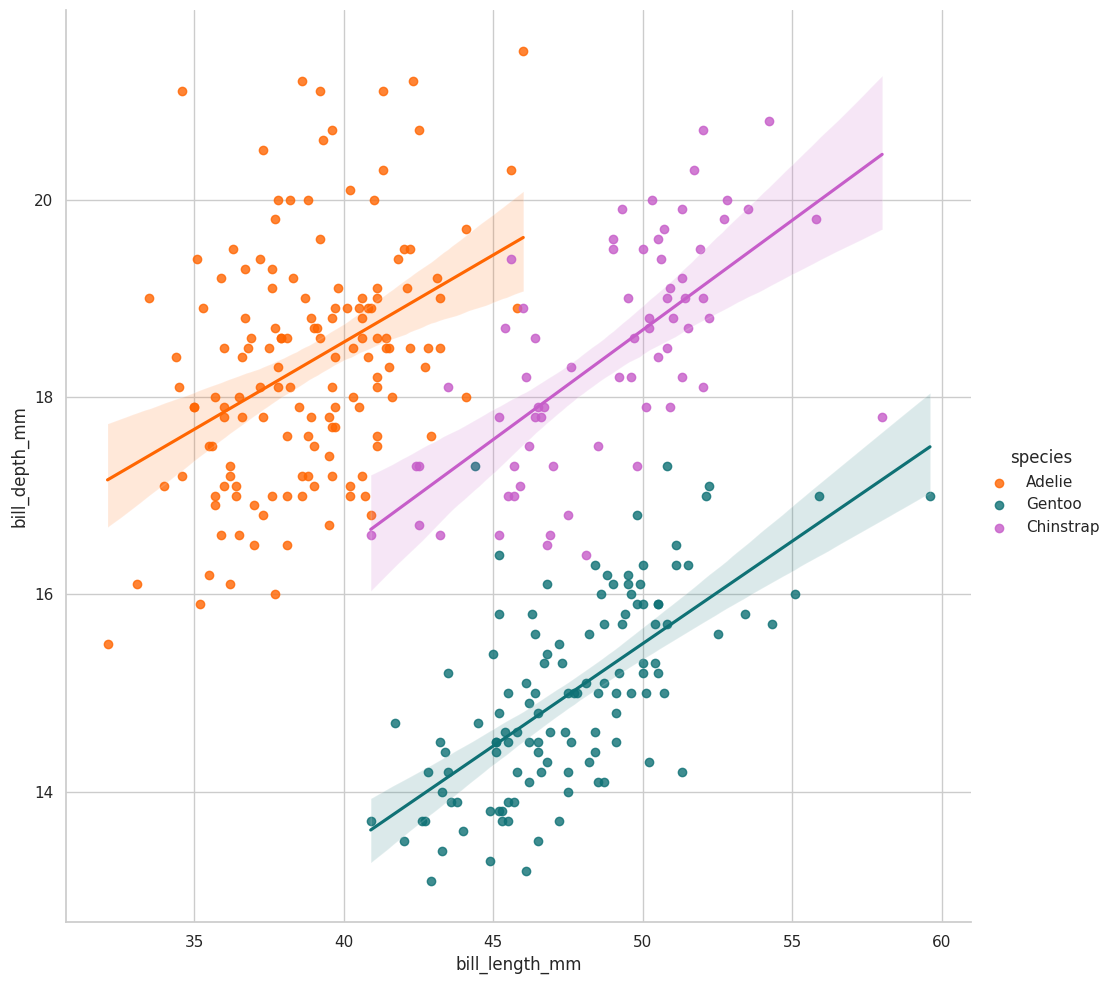

In [17]:
sns.lmplot(
    data=processed_penguins_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    hue = 'species',
    palette=penguin_color,
    height=10
)

<a id ="multipleregression"></a>

## 5. Análisis de regresión multiple

[Tabla de contenido](#table-of-content)

### Modelo 1

In [19]:
model_1 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm',
        data=processed_penguins_df
    )
    .fit()
)
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           1.54e-32
Time:                        07:22:20   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Modelo 2

In [20]:
model_2 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm',
        data=processed_penguins_df
    )
    .fit()
)
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           7.04e-46
Time:                        07:23:21   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Modelo 3

In [23]:
model_3 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm',
        data=processed_penguins_df
    )
    .fit()
)
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          9.26e-103
Time:                        07:26:25   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Modelo 4

In [24]:
model_4 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)',
        data=processed_penguins_df
    )
    .fit()
)
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          6.28e-122
Time:                        07:26:28   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Modelo 5

In [26]:
model_5 = (
    smf.ols(
        formula='body_mass_g ~ flipper_length_mm + C(sex)',
        data=processed_penguins_df
    )
    .fit()
)
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          3.53e-118
Time:                        07:27:54   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Visualizacion de los resultados

In [27]:
models_results = pd.DataFrame(
    dict(
        actual_value = processed_penguins_df.body_mass_g,
        prediction_model_1 = model_1.predict(),
        prediction_model_2 = model_2.predict(),
        prediction_model_3 = model_3.predict(),
        prediction_model_4 = model_4.predict(),
        prediction_model_5 = model_5.predict(),
        species = processed_penguins_df.species,
        sex = processed_penguins_df.sex
    )
)

models_results.head()

,actual_value,prediction_model_1,prediction_model_2,prediction_model_3,prediction_model_4,prediction_model_5,species,sex
0,3750.0,3782.402961,3617.641192,3204.761227,3579.136946,3441.323750,Adelie,male
1,3800.0,3817.119665,3836.725580,3436.701722,3343.220772,3328.384372,Adelie,female
2,3250.0,3886.553073,3809.271371,3906.897032,3639.137335,3751.223949,Adelie,female
4,3450.0,3574.102738,3350.786581,3816.705772,3457.954243,3657.259599,Adelie,female
5,3650.0,3799.761313,3356.140070,3696.168128,3764.536023,3864.163327,Adelie,male


ECDFs

/home/fernando/Desktop/Platzi/DatosPythonPlatzi/.venv/lib/python3.11/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `jn.select` instead.
  return method(self._obj, *args, **kwargs)


<Axes: ylabel='Proportion'>

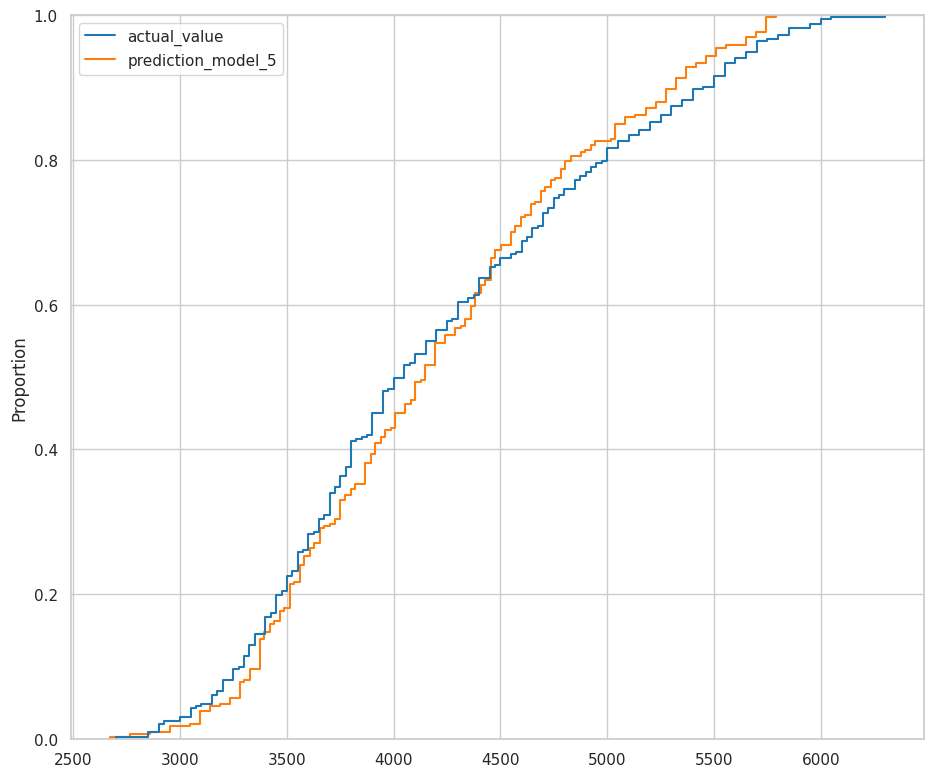

In [29]:
sns.ecdfplot(
    data=models_results.select_columns(['actual_value', 'prediction_model_5'])
)

### PDF

<Axes: ylabel='Density'>

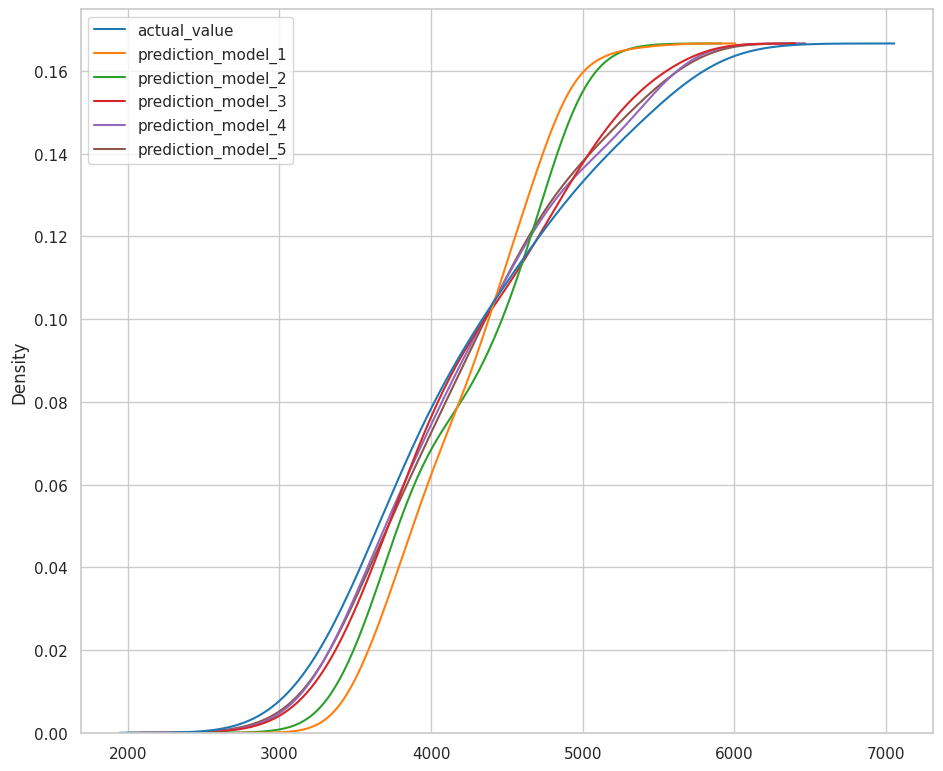

In [31]:
sns.kdeplot(
    data=models_results,
    cumulative= True
)

### Como encontrar mas rapido el modelo

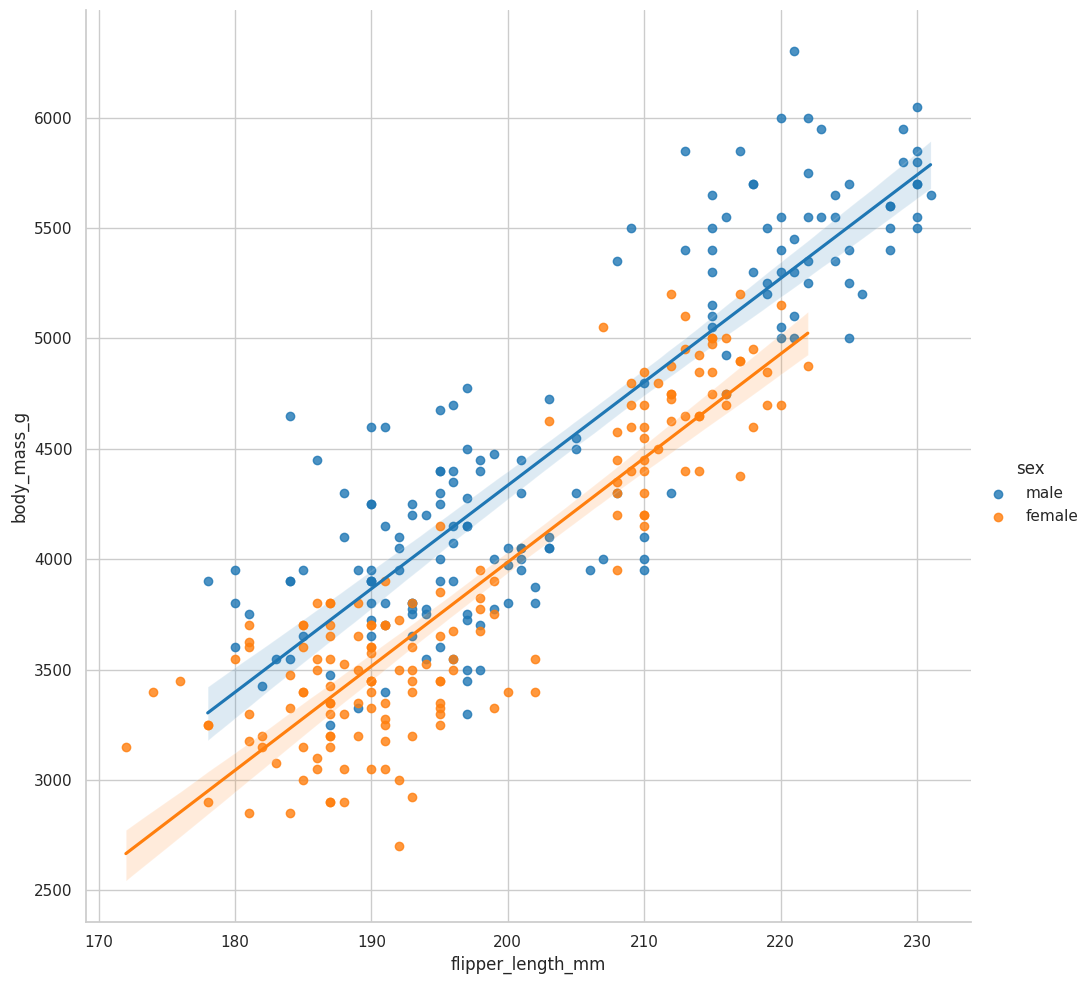

In [32]:
sns.lmplot(
    data=processed_penguins_df,
    x = 'flipper_length_mm',
    y = 'body_mass_g',
    hue='sex',
    height=10
)

<a id ="logisticregression"></a>

## 6. Regresion Logistica

[Tabla de contenido](#table-of-content)

In [33]:
smf.logit(
    formula='numeric_sex ~ flipper_length_mm + bill_depth_mm + bill_length_mm + C(island)',
    data=processed_penguins_df
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Sun, 23 Jun 2024   Pseudo R-squ.:                  0.4793
Time:                        07:43:21   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -61.4464      6.944     -8.849      0.000     -75.057     -47.836
C(island)[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
C(island)[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm          0.1393      0.024      5.874      0.000       0.093       0.186
bill_depth_mm              1.6401      0.185      8.864      0.000       1.277       2.003
bill_length_mm             0.1413      0.045      3.150      0.002       0.053       0.229
==========================================================================================
"""

### Exploracion de variables categoricas

In [34]:
(
    processed_penguins_df
    .value_counts(['island', 'sex'])
    .reset_index(name = 'count')
)

,island,sex,count
0,Biscoe,male,83
1,Biscoe,female,80
2,Dream,male,62
3,Dream,female,61
4,Torgersen,female,24
5,Torgersen,male,23


### Validando la especie

In [35]:
processed_penguins_df.species.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [36]:
processed_penguins_df = (
    processed_penguins_df
    .assign(is_adelie = lambda df: df.species.replace(['Adelie', 'Gentoo', 'Chinstrap'], [1, 0, 0]))
)

/tmp/ipykernel_15209/4288328744.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .assign(is_adelie = lambda df: df.species.replace(['Adelie', 'Gentoo', 'Chinstrap'], [1, 0, 0]))


In [38]:
model_is_adelie = smf.logit(
    formula='is_adelie ~ flipper_length_mm + C(sex)',
    data=processed_penguins_df
).fit()

model_is_adelie.params

Optimization terminated successfully.
         Current function value: 0.355225
         Iterations 8


Intercept            40.568368
C(sex)[T.male]        1.282656
flipper_length_mm    -0.209705
dtype: float64

In [39]:
is_adelie_df_predictions = pd.DataFrame(
    dict(
        actual_adelie = processed_penguins_df.is_adelie,
        predicted_values = model_is_adelie.predict().round()
    )
)

is_adelie_df_predictions.head()

,actual_adelie,predicted_values
0,1,1.0
1,1,1.0
2,1,0.0
4,1,1.0
5,1,1.0


In [40]:
(
    is_adelie_df_predictions
    .value_counts(['actual_adelie', 'predicted_values'])
    .reset_index(name = 'count')
)

,actual_adelie,predicted_values,count
0,0,0.0,151
1,1,1.0,129
2,0,1.0,36
3,1,0.0,17


In [41]:
print(
    sklearn.metrics.confusion_matrix(
        is_adelie_df_predictions.actual_adelie,
        is_adelie_df_predictions.predicted_values
    )
)

sklearn.metrics.accuracy_score(
    is_adelie_df_predictions.actual_adelie,
    is_adelie_df_predictions.predicted_values   
)

[[151  36]
 [ 17 129]]


0.8408408408408409

<a id ="simpsonparadox"></a>

## 7. Paradoja de Simpsion

[Tabla de contenido](#table-of-content)